# ValueError with `az.plot_joint()`

I am trying to reproduce one the plots in Osvaldo Martin's GitHub.
I want to plot the figure displayed at **cell 16** of [his Jupyter Notebook](https://github.com/aloctavodia/BAP/blob/master/code/Chp2/02%20Programming%20probabilistically.ipynb).

Unfortunately, I get an error: `Number of rows must be a positive integer, not 0` — see below.

## Setup

In [1]:
# import required modules
import numpy as np
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# load data
data = np.array( [51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 
                  53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 
                  51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 
                  54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16] )

In [3]:
# run PyMC3 model
with pm.Model() as model_g:
    # specify priors
    μ = pm.Uniform("μ", lower = 40, upper = 70)
    σ = pm.HalfNormal("σ", sd = 10)
    
    # specify likelihood
    y = pm.Normal("y", mu = μ, sd = σ,
                 observed = data)
    
    # start sampling
    trace_g = pm.sample(1000)

<ipython-input-3-f502eef3269c>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_g = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Valerio\anaconda3\envs\bap\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 66 seconds.


## The error

The `az.plot_joint()` function is deprecated and used to throw the error:

```
ValueError: Number of rows must be a positive integer, not 0
```

C:\Users\Valerio\anaconda3\envs\bap\lib\site-packages\arviz\plots\jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
C:\Users\Valerio\anaconda3\envs\bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:xlabel='μ', ylabel='σ'>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

C:\Users\Valerio\anaconda3\envs\bap\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


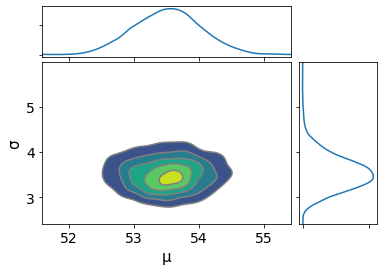

In [4]:
# plot posteriors with plot_joint
az.plot_joint(trace_g, kind = "kde", fill_last = False)

## Solution

Thanks to [OriolAbril](https://github.com/OriolAbril) and [ahartikainen](https://github.com/ahartikainen), who provided the solution [here](https://github.com/arviz-devs/arviz/issues/1633#issuecomment-807308617).

C:\Users\Valerio\anaconda3\envs\bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='μ', ylabel='σ'>, <AxesSubplot:>]],
      dtype=object)

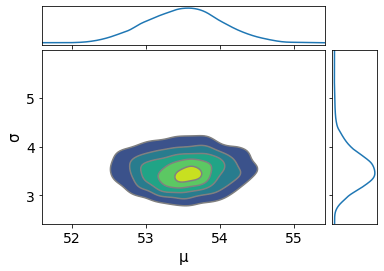

In [5]:
# use plot_pair instead of plot_joint!!!
az.plot_pair(trace_g, kind = "kde", fill_last = False, marginals = True)